In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ancova
import seaborn as sns

In [2]:
#%% Cargar la base de datos
data = pd.read_csv(r"C:\Users\Daniela de la Torre\OneDrive\Escritorio\4to_Semestre\Analisis Estadistico Multivariado\archive (11)\Diet_WeightLoss_Study.csv")


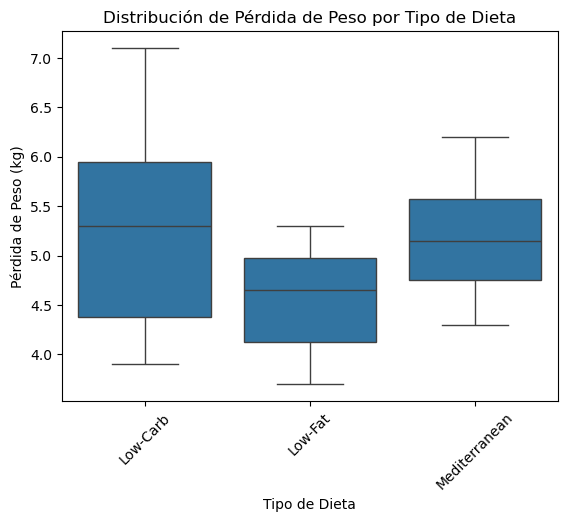

In [3]:
# Filtrar los datos por tipo de dieta
sns.boxplot(data=data, x='Diet Type', y='Weight Loss (kg)')
plt.xticks(rotation=45)
plt.title('Distribución de Pérdida de Peso por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Pérdida de Peso (kg)')
plt.show()

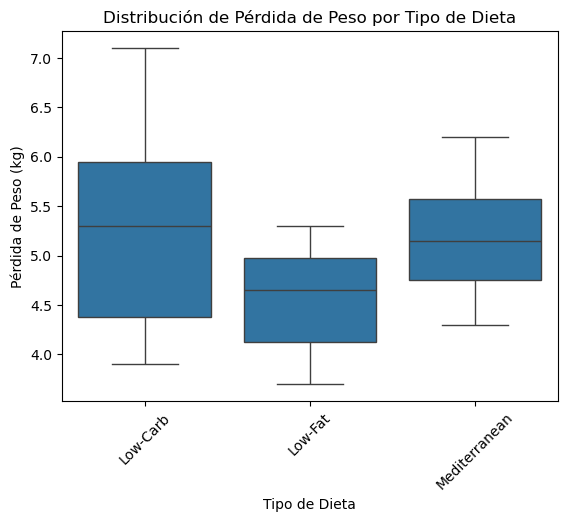

In [4]:
# Seleccionar algunos tipos de dieta y extraer una muestra
diet_types = ['Low-Carb', 'Low-Fat', 'Mediterranean']
sample_size = 10  # Cambiar el tamaño de la muestra según sea necesario

sample_list = []
for diet in diet_types:
    sample = data[data['Diet Type'] == diet].sample(sample_size, random_state=42)
    sample_list.append(sample)

# Concatenar todas las muestras en un único DataFrame
sample = pd.concat(sample_list)

# Visualizar la distribución de pérdida de peso por tipo de dieta
sns.boxplot(data=sample, x='Diet Type', y='Weight Loss (kg)')
plt.title('Distribución de Pérdida de Peso por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Pérdida de Peso (kg)')
plt.xticks(rotation=45)
plt.show()



Resumen Estadístico de Weight Loss (kg) por Age:
     N  Mean      SD    SE  95% Conf.  Interval
Age                                            
29   2  3.85  0.0707  0.05     3.2147    4.4853
33   2  4.00  0.4243  0.30     0.1881    7.8119
34   1  4.00     NaN   NaN        NaN       NaN
35   1  4.70     NaN   NaN        NaN       NaN
36   1  4.10     NaN   NaN        NaN       NaN
37   2  4.45  0.2121  0.15     2.5441    6.3559
38   1  5.00     NaN   NaN        NaN       NaN
39   2  4.80  0.2828  0.20     2.2588    7.3412
41   2  5.30  0.2828  0.20     2.7588    7.8412
42   1  4.80     NaN   NaN        NaN       NaN
44   2  4.55  0.4950  0.35     0.1028    8.9972
45   1  6.20     NaN   NaN        NaN       NaN
46   1  5.30     NaN   NaN        NaN       NaN
47   1  5.10     NaN   NaN        NaN       NaN
48   1  5.50     NaN   NaN        NaN       NaN
49   1  5.80     NaN   NaN        NaN       NaN
50   2  5.25  0.4950  0.35     0.8028    9.6972
51   1  5.80     NaN   NaN        NaN

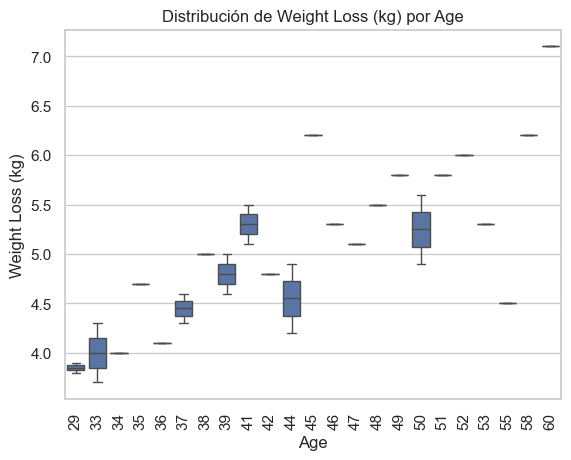

In [5]:
# Resumen Estadístico
resumen = rp.summary_cont(sample['Weight Loss (kg)'].groupby(sample['Age']))
print("Resumen Estadístico de Weight Loss (kg) por Age:")
print(resumen)

# BoxPlot
sns.set(style="whitegrid")
sns.boxplot(x='Age', y='Weight Loss (kg)', data=sample)
plt.xticks(rotation=90)
plt.title("Distribución de Weight Loss (kg) por Age")
plt.xlabel("Age")
plt.ylabel("Weight Loss (kg)")
plt.show()

In [6]:
#%% Supuestos para ANCOVA

# Nota: Para ANCOVA, además de los supuestos del ANOVA, debemos verificar la relación lineal 
# entre la covariable (GPA) y la variable dependiente (salary) y que la covariable sea independiente del factor.

# Normalidad de los residuos del modelo ANCOVA se evaluará más adelante en el modelo ajustado.


In [7]:
# Prueba de Homocedasticidad (Levene)
print("Prueba de Homocedasticidad (Levene):")
levene_test = pg.homoscedasticity(sample, dv='Weight Loss (kg)', group='Diet Type', method='levene')
print(levene_test)

# Prueba de Homocedasticidad (Bartlett)
print("Prueba de Homocedasticidad (Bartlett):")
bartlett_test = pg.homoscedasticity(sample, dv='Weight Loss (kg)', group='Diet Type', method='bartlett')
print(bartlett_test)

Prueba de Homocedasticidad (Levene):
               W      pval  equal_var
levene  3.417051  0.047547      False
Prueba de Homocedasticidad (Bartlett):
                 T      pval  equal_var
bartlett  4.447613  0.108196       True


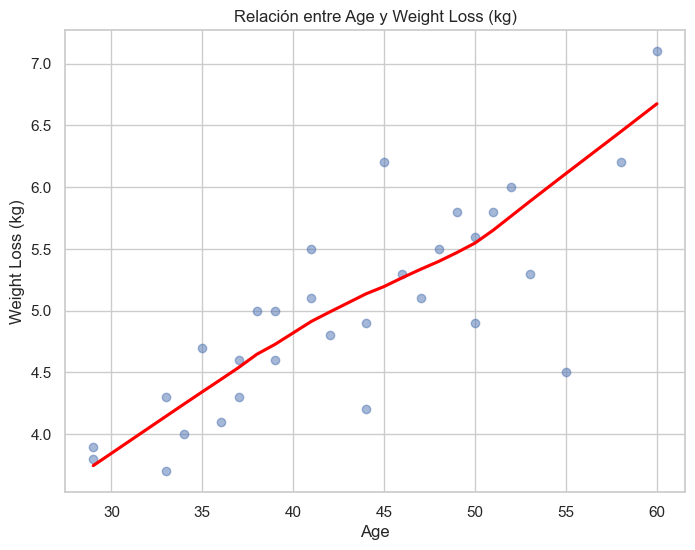

In [8]:
# Verificar la relación lineal entre Age y Weight Loss (kg)
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Weight Loss (kg)', data=sample, lowess=True, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title("Relación entre Age y Weight Loss (kg)")
plt.xlabel("Age")
plt.ylabel("Weight Loss (kg)")
plt.grid(True)
plt.show()

In [ ]:
##import statsmodels.api as sm
##from statsmodels.formula.api import ols

# ANCOVA: Modelo con interacción entre Age y Diet Type
# Para evaluar si la pendiente entre Age y Weight Loss difiere entre tipos de dieta
##model_ancova_int = ols('Q("Weight Loss") ~ Age * Q("Diet Type")', data=sample).fit()
#anova_table_ancova_int = sm.stats.anova_lm(model_ancova_int, typ=2)
#print("Tabla ANCOVA (con interacción Age * Diet Type):")
#print(anova_table_ancova_int)

# Imprimir el resumen del modelo ANCOVA
#print(model_ancova_int.summary())

PatsyError: Error evaluating factor: NameError: no data named 'Weight Loss' found
    Q("Weight Loss") ~ Age * Q("Diet Type")
    ^^^^^^^^^^^^^^^^

In [ ]:
#%%
print(model_ancova_int.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     78.60
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.03e-132
Time:                        17:34:55   Log-Likelihood:                -12487.
No. Observations:                1200   AIC:                         2.500e+04
Df Residuals:                    1188   BIC:                         2.506e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

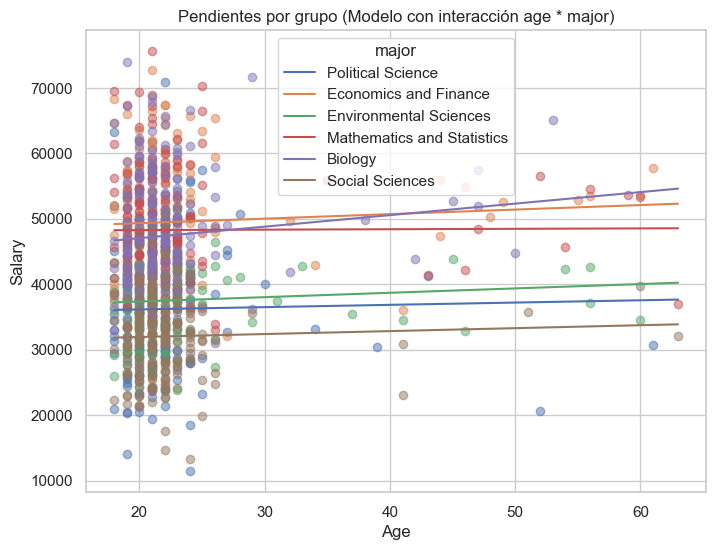

In [ ]:
#%% Gráfica de las pendientes

# Definir un rango de valores para age
gpa_range = np.linspace(sample['age'].min(), sample['age'].max(), 100)

plt.figure(figsize=(8,6))

# Iterar sobre cada nivel de 'major'
for group in sample['major'].unique():
    # Crear un DataFrame para predicciones: se fija 'major' y se varía age
    new_data = pd.DataFrame({'age': gpa_range, 'major': group})
    
    # Predecir salary usando el modelo con interacción
    pred = model_ancova_int.predict(new_data)
    
    # Graficar la línea de predicción para este grupo
    plt.plot(gpa_range, pred, label=group)
    
    # Graficar los datos reales para el grupo
    group_data = sample[sample['major'] == group]
    plt.scatter(group_data['age'], group_data['salary'], alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Pendientes por grupo (Modelo con interacción age * major)')
plt.legend(title='major')
plt.show()


In [ ]:
#%% ANCOVA: Modelo básico sin interacción
# Se ajusta el modelo: salary ~ GPA (covariable) + age (factor)
model_ancova = ols('salary ~ age + major', data=sample).fit()
anova_table_ancova = sm.stats.anova_lm(model_ancova, typ=2)
print("Tabla ANCOVA (sin interacción):")
print(anova_table_ancova)

# Evaluar los residuos del modelo ANCOVA para normalidad
residuals = model_ancova.resid
normality_test = pg.normality(residuals)
print("Prueba de Normalidad de los residuos del modelo ANCOVA:")
print(normality_test)

Tabla ANCOVA (sin interacción):
                sum_sq      df           F         PR(>F)
major     5.534297e+10     5.0  171.967191  7.455287e-138
age       1.383725e+08     1.0    2.149824   1.428498e-01
Residual  7.678693e+10  1193.0         NaN            NaN
Prueba de Normalidad de los residuos del modelo ANCOVA:
          W      pval  normal
0  0.991989  0.000004   False


In [ ]:
#%%
print(model_ancova.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          1.42e-137
Time:                        17:34:56   Log-Likelihood:                -12487.
No. Observations:                1200   AIC:                         2.499e+04
Df Residuals:                    1193   BIC:                         2.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [ ]:
#%% Comparación múltiple (post hoc) para el factor 'age' en el modelo ANCOVA sin interacción
# Se obtienen las medias ajustadas (estimadas) para cada grupo
means_adjusted = model_ancova.predict(sample)
sample['adjusted_salary'] = sample['salary'] - (sample['age'] - sample['age'].mean()) * model_ancova.params['age']

comp = mc.MultiComparison(sample['adjusted_salary'], sample['major'])
post_hoc_res = comp.tukeyhsd()
print("Comparaciones múltiples (Tukey) para las medias ajustadas por GPA:")
print(post_hoc_res.summary())

Comparaciones múltiples (Tukey) para las medias ajustadas por GPA:
                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
          group1                     group2             meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------------------------------------
                   Biology      Economics and Finance    2073.384 0.1016   -215.6297   4362.3976  False
                   Biology     Environmental Sciences  -9905.5939    0.0 -12194.6075  -7616.5803   True
                   Biology Mathematics and Statistics    848.8863 0.8976  -1440.1274   3137.8999  False
                   Biology          Political Science -11176.9356    0.0 -13465.9492   -8887.922   True
                   Biology            Social Sciences -15374.6849    0.0 -17663.6985 -13085.6712   True
     Economics and Finance     Environmental Sciences -11978.9779    0.0 -14267.9915  -9689.9642   Tr

In [ ]:
#%% ANCOVA con pingouin
ancova(data=sample, dv='salary', covar='age', between='major')


,Source,SS,DF,F,p-unc,np2
0,major,5.534297e+10,5,171.967191,7.455287e-138,0.418853
1,age,1.383725e+08,1,2.149824,1.428498e-01,0.001799
2,Residual,7.678693e+10,1193,NaN,NaN,NaN


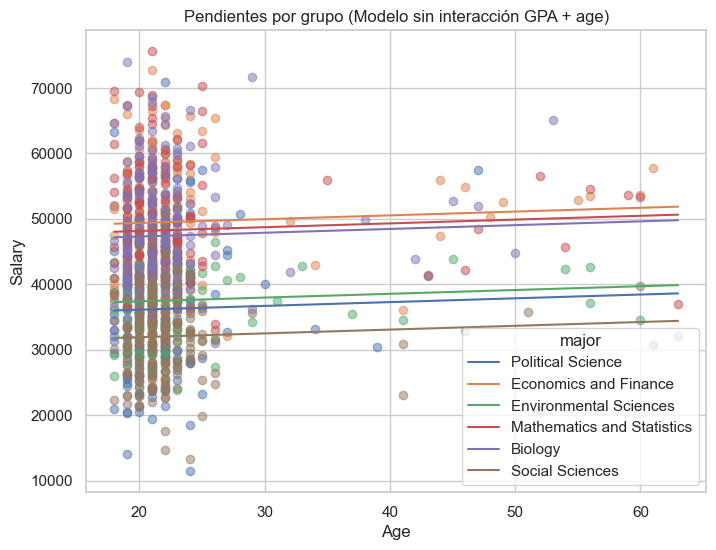

In [ ]:
#%% Definir un rango de valores para GPA
gpa_range = np.linspace(sample['age'].min(), sample['age'].max(), 100)

plt.figure(figsize=(8,6))

# Iterar sobre cada nivel de 'major'
for group in sample['major'].unique():
    # Crear un DataFrame para predicciones: se fija 'major' y se varía GPA
    new_data = pd.DataFrame({'age': gpa_range, 'major': group})
    
    # Predecir salary usando el modelo con interacción
    pred = model_ancova.predict(new_data)
    
    # Graficar la línea de predicción para este grupo
    plt.plot(gpa_range, pred, label=group)
    
    # Graficar los datos reales para el grupo
    group_data = sample[sample['major'] == group]
    plt.scatter(group_data['age'], group_data['salary'], alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Pendientes por grupo (Modelo sin interacción GPA + age)')
plt.legend(title='major')
plt.show()


Nos damos cuenta que la edad no es estadísticamente significante para el salario.